In [1]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import layers
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from PIL import Image

### 从文件加载数据

In [2]:
# 读取 CSV 文件
def readImage(image_path, file_path):
    csv_file = pd.read_csv(file_path)
    # 获取列数据
    train_data_file = csv_file['train']
    train_data_label = csv_file['train_label']
    test_data_file = csv_file['test']
    test_data_label = csv_file['test_label']
    x, y_ , t, yt_= [], [], [], []
    for _index in np.arange(0, train_data_file.shape[0], 1):
        if pd.notna(train_data_file.iloc[_index]):  # 判断如果数据非空
            img_ = Image.open(image_path + train_data_file[_index])
            img_ = np.array(img_.convert('L'))
            img_ = img_ / 255.  # 数据标准归一化
            x.append(img_)
            y_.append(train_data_label[_index])
    for _index in np.arange(0, test_data_file.shape[0], 1):
        if pd.notna(test_data_file.iloc[_index]):
            img_ = Image.open(image_path + test_data_file[_index])
            img_ = np.array(img_.convert('L'))
            img_ = img_ / 255.
            t.append(img_)
            yt_.append(test_data_label[_index])
    return (x, y_), (t, yt_)

(train_img, train_lab), (test_img, test_lab)  = readImage(image_path='../Data/MNIST/', file_path='../Data/MNIST/file_name.csv')

### 数据增强
```
img_prossess_Gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale='所有数据乘以这个数（倍乘）',
    horizontal_flip='是否随机水平旋转 Boolean',
    rotation_rang='随机旋转的角度范围 Int',
    width_shift_range='随机宽度偏移量',
    height_shift_range='随机高度便宜量',
    zoom_range='随机缩放的范围 Float or [lower, upper].'
)
```

TypeError: float() argument must be a string or a number, not 'ImageDataGenerator'

### 读取标准数据集

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='E:\Code\myMachineLearning\Tensorflow2\Data\mnist.npz')
x_train, x_test = x_train/255.0, x_test/255.0

print('训练集样本的大小:', x_train.shape)
print('训练集标签的大小:', y_train.shape)
print('测试集样本的大小:', x_test.shape)
print('测试集标签的大小:', y_test.shape)

训练集样本的大小: (60000, 28, 28)
训练集标签的大小: (60000,)
测试集样本的大小: (10000, 28, 28)
测试集标签的大小: (10000,)


In [ ]:
img_prossess_Gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./1.,
    horizontal_flip=True,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    zoom_range=0.5
)
img_prossess_Gen.fit(train_img)

In [ ]:
# 显示出一张灰度图片看看
im = x_train[1]
im = im.reshape(-1, 28)
plt.imshow(im,cmap='Greys')
plt.show()

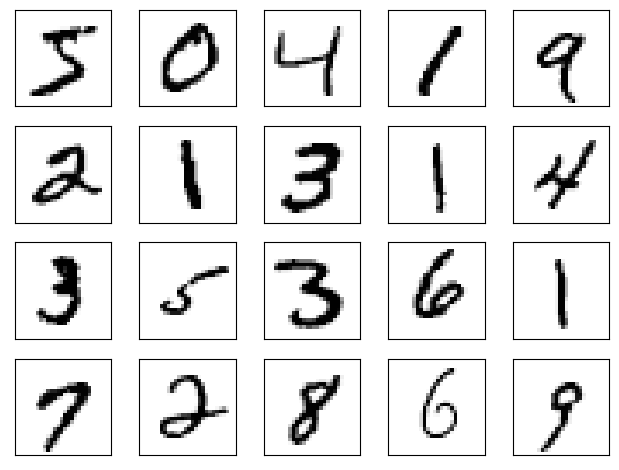

In [10]:
#可视化样本，下面是输出了训练集中前20个样本
fig, ax = plt.subplots(nrows=4,ncols=5,sharex='all',sharey='all')
ax = ax.flatten()
for i in range(20):
    img = x_train[i].reshape(28, 28)
    ax[i].imshow(img,cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

Sequential构建

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

In [ ]:
独立class构建

In [12]:
class mnisModel(Model):
    def __init__(self, *args, **kwargs):
        super(mnisModel, self).__init__(*args, **kwargs)

        self.flatten1=layers.Flatten()
        self.d1=layers.Dense(128, activation=tf.keras.activations.relu)
        self.d2=layers.Dense(10, activation=tf.keras.activations.softmax)

    def call(self, input):
        x = self.flatten1(input)
        x = self.d1(x)
        x = self.d2(x)
        return(x)

model = mnisModel()

In [13]:
model.compile(optimizer='adam',     # 'adam'  tf.keras.optimizers.Adam(learning_rate=0.4 , beta_1=0.9, beta_2=0.999)
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data = (x_test, y_test), validation_freq=1)
model.summary()

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2562 - sparse_categorical_accuracy: 0.9269 - val_loss: 0.1340 - val_sparse_categorical_accuracy: 0.9592
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1129 - sparse_categorical_accuracy: 0.9673 - val_loss: 0.1017 - val_sparse_categorical_accuracy: 0.9686
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0782 - sparse_categorical_accuracy: 0.9762 - val_loss: 0.0818 - val_sparse_categorical_accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0572 - sparse_categorical_accuracy: 0.9824 - val_loss: 0.0784 - val_sparse_categorical_accuracy: 0.9744
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0434 - sparse_categorical_accuracy: 0.9878 - val_loss: 0.0768 - val_sparse_categorical_accuracy: 0.9755
Model: "mnis_model_2"
_________________________________________________________________
Layer (